# IMPORT DEPENDENCIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# IMPORT DATASET

In [3]:
from tensorflow.keras.datasets import cifar10

In [4]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 7s 0us/step


In [6]:
print(x_train.shape,y_train.shape,x_test.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3)


### We have:
##### 50,000 training images (32x32)
##### 10,000 testing images  (32x32)
##### 3 color channels

In [7]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [8]:
y_train[0]

array([6], dtype=uint8)

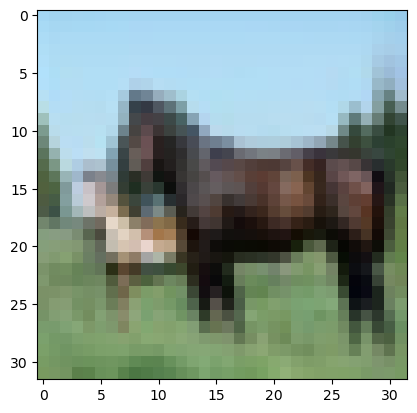

In [12]:
plt.imshow(x_train[12])

# DATA PRE_PROCESSING

In [14]:
x_train.max()

255

In [15]:
x_train.min()

0

In [16]:
x_train, x_test = x_train/255, x_test/255

In [17]:
x_train.max()

1.0

In [19]:
x_train.shape

(50000, 32, 32, 3)

In [20]:
from tensorflow.keras.utils import to_categorical
y_train, y_test = to_categorical(y_train), to_categorical(y_test)

In [21]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

# BUILD MODEL

In [22]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPool2D, Conv2D, Dense, Flatten, Dropout, BatchNormalization

In [32]:
model = Sequential()

# FIRST CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(32,32,3), activation='relu'))#, padding='valid'))

# POOLING LAYER
model.add(MaxPool2D(pool_size=(2,2)))

# Second CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(32,32,3), activation='relu'))#, padding='valid'))

# POOLING LAYER
model.add(MaxPool2D(pool_size=(2,2)))

# FLATTEN LAYER - reshape data to ond-dimension vector (28x28 = 764)
model.add(Flatten())

# DENSE LAYER
model.add(Dense(128, activation='relu'))

# LAST LAYER -> MULTICLASS PROBLEM - softmac
model.add(Dense(10, activation='softmax'))

# COMPILER
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [33]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 12, 12, 32)        9248      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 6, 6, 32)          0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 1152)              0         
                                                                 
 dense_6 (Dense)             (None, 128)              

In [34]:
early_stop = EarlyStopping(monitor='val_loss', patience=3)

In [35]:
model.fit(x_train,y_train, epochs=15, validation_data=(x_test,y_test),callbacks=[early_stop])

Epoch 1/10


1563/1563 [==============================] - 15s 9ms/step - loss: 1.5085 - accuracy: 0.4611 - val_loss: 1.2290 - val_accuracy: 0.5771
Epoch 2/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.1274 - accuracy: 0.6070 - val_loss: 1.2074 - val_accuracy: 0.5730
Epoch 3/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.9691 - accuracy: 0.6612 - val_loss: 1.0821 - val_accuracy: 0.6273
Epoch 4/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.8628 - accuracy: 0.7013 - val_loss: 1.0669 - val_accuracy: 0.6389
Epoch 5/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.7818 - accuracy: 0.7284 - val_loss: 0.9924 - val_accuracy: 0.6692
Epoch 6/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.7160 - accuracy: 0.7540 - val_loss: 0.9309 - val_accuracy: 0.6938
Epoch 7/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.6624 - accuracy: 0.7728 - val_loss: 0.9778 - val_

In [54]:
from tensorflow.python.keras import regularizers
from tensorflow.keras.activations import relu

model = Sequential()


# FIRST CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(32,32,3), activation='relu'))#, kernel_regularizer=regularizers.l2(0.01)))#, padding='valid'))

#model.add(BatchNormalization())

# POOLING LAYER
model.add(MaxPool2D(pool_size=(2,2)))

# Second CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(32,32,3), activation='relu'))#, padding='valid'))

# POOLING LAYER
model.add(MaxPool2D(pool_size=(2,2)))

# FLATTEN LAYER - reshape data to ond-dimension vector (28x28 = 764)
model.add(Flatten())

# DENSE LAYER
model.add(Dense(256, activation='relu'))

model.add(Dropout(0.2))

# LAST LAYER -> MULTICLASS PROBLEM - softmac
model.add(Dense(10, activation='softmax'))

# COMPILER
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])


"""
def my_model():
  inputs = keras.Input(shape=(32,32,3))
  x = layers.Conv2D(32,3, padding='same', kernel_regularizer=regularizers.l2(0.01))(inputs)   #
  x = layers.BatchNormalization()(x) # not using activation before bcs of this
  x = keras.activations.relu(x)
  x = layers.MaxPooling2D((2,2))(x)
  x = layers.Conv2D(64,5, padding='same', kernel_regularizer=regularizers.l2(0.01))(x)
  x = layers.BatchNormalization()(x) # not using activation before bcs of this
  x = keras.activations.relu(x)
  x = layers.MaxPooling2D((2,2))(x)
  x = layers.Conv2D(128,3, padding='same', kernel_regularizer=regularizers.l2(0.01))(x)
  x = layers.BatchNormalization()(x)
  x = keras.activations.relu(x)
  x = layers.Flatten()(x)
  x = layers.Dense(64, activation = 'relu',  kernel_regularizer=regularizers.l2(0.01))(x)
  x = layers.Dropout(0.5)(x) # longer to trsin
  outputs = layers.Dense(10)(x)
  model = keras.Model(inputs=inputs,outputs=outputs)
  return model
"""


"\ndef my_model():\n  inputs = keras.Input(shape=(32,32,3))\n  x = layers.Conv2D(32,3, padding='same', kernel_regularizer=regularizers.l2(0.01))(inputs)   #\n  x = layers.BatchNormalization()(x) # not using activation before bcs of this\n  x = keras.activations.relu(x)\n  x = layers.MaxPooling2D((2,2))(x)\n  x = layers.Conv2D(64,5, padding='same', kernel_regularizer=regularizers.l2(0.01))(x)\n  x = layers.BatchNormalization()(x) # not using activation before bcs of this\n  x = keras.activations.relu(x)\n  x = layers.MaxPooling2D((2,2))(x)\n  x = layers.Conv2D(128,3, padding='same', kernel_regularizer=regularizers.l2(0.01))(x)\n  x = layers.BatchNormalization()(x)\n  x = keras.activations.relu(x)\n  x = layers.Flatten()(x)\n  x = layers.Dense(64, activation = 'relu',  kernel_regularizer=regularizers.l2(0.01))(x)\n  x = layers.Dropout(0.5)(x) # longer to trsin\n  outputs = layers.Dense(10)(x)\n  model = keras.Model(inputs=inputs,outputs=outputs)\n  return model\n"

In [55]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 14, 14, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_15 (Conv2D)          (None, 12, 12, 32)        9248      
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 6, 6, 32)          0         
 ng2D)                                                           
                                                                 
 flatten_6 (Flatten)         (None, 1152)              0         
                                                                 
 dense_12 (Dense)            (None, 256)              

In [56]:
model.fit(x_train,y_train, epochs=15, validation_data=(x_test,y_test),callbacks=[early_stop])

Epoch 1/15
1563/1563 [==============================] - 13s 7ms/step - loss: 1.5018 - accuracy: 0.4605 - val_loss: 1.2864 - val_accuracy: 0.5506
Epoch 2/15
1563/1563 [==============================] - 11s 7ms/step - loss: 1.1494 - accuracy: 0.5977 - val_loss: 1.0791 - val_accuracy: 0.6220
Epoch 3/15
1563/1563 [==============================] - 11s 7ms/step - loss: 1.0057 - accuracy: 0.6505 - val_loss: 1.1552 - val_accuracy: 0.6114
Epoch 4/15
1563/1563 [==============================] - 11s 7ms/step - loss: 0.9162 - accuracy: 0.6840 - val_loss: 1.2521 - val_accuracy: 0.5934
Epoch 5/15
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8535 - accuracy: 0.7087 - val_loss: 0.9536 - val_accuracy: 0.6722
Epoch 6/15
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8192 - accuracy: 0.7230 - val_loss: 0.9904 - val_accuracy: 0.6736
Epoch 7/15
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7962 - accuracy: 0.7315 - val_loss: 1.2239 - val_ac

In [57]:
metrics = pd.DataFrame(model.history.history)

<Axes: >

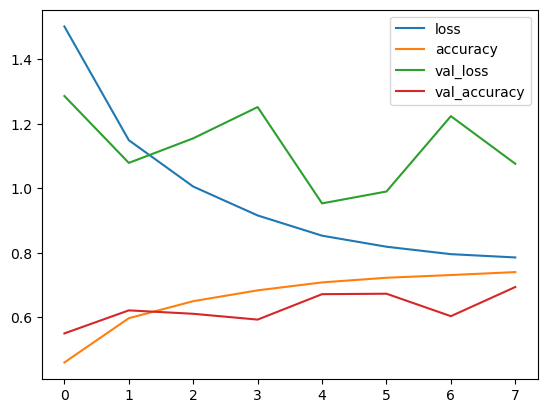

In [58]:
metrics.plot()

In [59]:
metrics.columns

Index(['loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')

<Axes: >

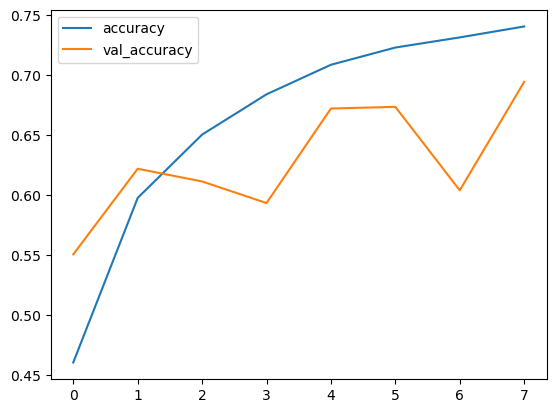

In [60]:
metrics[['accuracy', 'val_accuracy']].plot()

In [61]:
print(model.metrics_names)
print(model.evaluate(x_test,y_test,verbose=0))

['loss', 'accuracy']
[1.076338529586792, 0.6944000124931335]


In [62]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.501828,0.46050,1.286358,0.5506
1,1.149428,0.59768,1.079057,0.6220
2,1.005694,0.65046,1.155168,0.6114
3,0.916166,0.68404,1.252059,0.5934
4,0.853481,0.70868,0.953553,0.6722
5,0.819232,0.72304,0.990382,0.6736
6,0.796212,0.73150,1.223896,0.6040
7,0.786001,0.74060,1.076339,0.6944


In [63]:
def highlight_max_elements(matrix):
    # Converte a lista para um array NumPy, caso ainda não seja
    matrix = np.array(matrix)
    
    # Inicializa um array de zeros com a mesma forma da matriz original
    result = np.zeros_like(matrix)
    
    # Itera sobre cada sub-array (linha) da matriz
    for i, row in enumerate(matrix):
        # Encontra o índice do maior elemento na linha atual
        max_index = np.argmax(row)
        # Define o maior elemento como 1 no array de resultado
        result[i, max_index] = 1
    
    return result  

In [64]:
from sklearn.metrics import classification_report,confusion_matrix

predictions = model.predict(x_test)
new_predictions = highlight_max_elements(predictions)

313/313 [==============================] - 1s 4ms/step


In [65]:
new_predictions

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [ ]:
pr